In [1]:
import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./iris.csv')

In [3]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Unnamed: 0      150 non-null int64
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
data = data.join(pd.get_dummies(data.Species))   # 直接进行独热编码,添加到原数据集

In [7]:
del data['Species']

In [8]:
index = np.random.permutation(len(data))
data = data.iloc[index]    #进行乱序处理，有利于训练数据

In [9]:
x = data[data.columns[1:-3]]  #取前四个作为x

In [10]:
y = data.iloc[:,-3:]  # 取最后三列作为y

In [11]:
x.shape,y.shape

((150, 4), (150, 3))

In [12]:
import tensorflow as tf
from tensorflow import keras   # 引用层
model = keras.Sequential()    # 顺序模型
from tensorflow.keras import layers #从keras引用层

In [13]:
model.add(layers.Dense(3, input_dim=4,activation='softmax'))   #输出的是3维的，输入是4维的
                                 #把sofymax激活，使输出的变成一个概率值

In [14]:
model.summary() # 查看参数

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']                                   
)              #目标数据做独热编码，用categorical_crossentropy来计算softmax的交叉熵              

In [16]:
history = model.fit(x, y, epochs=3000)

Train on 150 samples
Epoch 1/3000
150/150 [==============================] - 1s 4ms/sample - loss: 1.7628 - acc: 0.3333
Epoch 2/3000
150/150 [==============================] - 0s 212us/sample - loss: 1.6903 - acc: 0.3333
Epoch 3/3000
150/150 [==============================] - 0s 226us/sample - loss: 1.6220 - acc: 0.3333
Epoch 4/3000
150/150 [==============================] - 0s 229us/sample - loss: 1.5587 - acc: 0.3333
Epoch 5/3000
150/150 [==============================] - 0s 208us/sample - loss: 1.4972 - acc: 0.3333
Epoch 6/3000
150/150 [==============================] - 0s 219us/sample - loss: 1.4428 - acc: 0.3333
Epoch 7/3000
150/150 [==============================] - 0s 228us/sample - loss: 1.3889 - acc: 0.3333
Epoch 8/3000
150/150 [==============================] - 0s 220us/sample - loss: 1.3468 - acc: 0.3333
Epoch 9/3000
150/150 [==============================] - 0s 213us/sample - loss: 1.3052 - acc: 0.3333
Epoch 10/3000
150/150 [==============================] - 0s 222us/sample

150/150 [==============================] - 0s 225us/sample - loss: 0.5782 - acc: 0.7000
Epoch 159/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.5768 - acc: 0.7000
Epoch 160/3000
150/150 [==============================] - 0s 223us/sample - loss: 0.5756 - acc: 0.7133
Epoch 161/3000
150/150 [==============================] - 0s 214us/sample - loss: 0.5741 - acc: 0.7133
Epoch 162/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.5727 - acc: 0.7067
Epoch 163/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.5715 - acc: 0.7133
Epoch 164/3000
150/150 [==============================] - 0s 214us/sample - loss: 0.5701 - acc: 0.7133
Epoch 165/3000
150/150 [==============================] - 0s 219us/sample - loss: 0.5688 - acc: 0.7133
Epoch 166/3000
150/150 [==============================] - 0s 214us/sample - loss: 0.5674 - acc: 0.7133
Epoch 167/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.5663

150/150 [==============================] - 0s 193us/sample - loss: 0.4378 - acc: 0.9267
Epoch 317/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.4376 - acc: 0.9267
Epoch 318/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.4365 - acc: 0.9267
Epoch 319/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.4360 - acc: 0.9267
Epoch 320/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.4354 - acc: 0.9267
Epoch 321/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.4347 - acc: 0.9267
Epoch 322/3000
150/150 [==============================] - 0s 204us/sample - loss: 0.4341 - acc: 0.9267
Epoch 323/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.4334 - acc: 0.9267
Epoch 324/3000
150/150 [==============================] - 0s 231us/sample - loss: 0.4330 - acc: 0.9267
Epoch 325/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.4322

150/150 [==============================] - 0s 227us/sample - loss: 0.3571 - acc: 0.9600
Epoch 475/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.3564 - acc: 0.9600
Epoch 476/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.3560 - acc: 0.9733
Epoch 477/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.3556 - acc: 0.9733
Epoch 478/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.3552 - acc: 0.9733
Epoch 479/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.3548 - acc: 0.9733
Epoch 480/3000
150/150 [==============================] - 0s 207us/sample - loss: 0.3543 - acc: 0.9733
Epoch 481/3000
150/150 [==============================] - 0s 192us/sample - loss: 0.3538 - acc: 0.9733
Epoch 482/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.3535 - acc: 0.9600
Epoch 483/3000
150/150 [==============================] - 0s 239us/sample - loss: 0.3530

150/150 [==============================] - 0s 203us/sample - loss: 0.2975 - acc: 0.9800
Epoch 633/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.2973 - acc: 0.9800
Epoch 634/3000
150/150 [==============================] - 0s 195us/sample - loss: 0.2969 - acc: 0.9800
Epoch 635/3000
150/150 [==============================] - 0s 191us/sample - loss: 0.2967 - acc: 0.9800
Epoch 636/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.2963 - acc: 0.9800
Epoch 637/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.2959 - acc: 0.9733
Epoch 638/3000
150/150 [==============================] - 0s 207us/sample - loss: 0.2956 - acc: 0.9733
Epoch 639/3000
150/150 [==============================] - 0s 218us/sample - loss: 0.2956 - acc: 0.9733
Epoch 640/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.2954 - acc: 0.9800
Epoch 641/3000
150/150 [==============================] - 0s 209us/sample - loss: 0.2949

150/150 [==============================] - 0s 219us/sample - loss: 0.2520 - acc: 0.9800
Epoch 791/3000
150/150 [==============================] - 0s 227us/sample - loss: 0.2518 - acc: 0.9800
Epoch 792/3000
150/150 [==============================] - 0s 224us/sample - loss: 0.2516 - acc: 0.9800
Epoch 793/3000
150/150 [==============================] - 0s 229us/sample - loss: 0.2513 - acc: 0.9800
Epoch 794/3000
150/150 [==============================] - 0s 225us/sample - loss: 0.2511 - acc: 0.9800
Epoch 795/3000
150/150 [==============================] - 0s 227us/sample - loss: 0.2508 - acc: 0.9800
Epoch 796/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.2507 - acc: 0.9800
Epoch 797/3000
150/150 [==============================] - 0s 211us/sample - loss: 0.2504 - acc: 0.9800
Epoch 798/3000
150/150 [==============================] - 0s 228us/sample - loss: 0.2500 - acc: 0.9800
Epoch 799/3000
150/150 [==============================] - 0s 235us/sample - loss: 0.2498

150/150 [==============================] - 0s 228us/sample - loss: 0.2164 - acc: 0.9800
Epoch 949/3000
150/150 [==============================] - 0s 246us/sample - loss: 0.2162 - acc: 0.9800
Epoch 950/3000
150/150 [==============================] - 0s 233us/sample - loss: 0.2160 - acc: 0.9800
Epoch 951/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.2159 - acc: 0.9800
Epoch 952/3000
150/150 [==============================] - 0s 215us/sample - loss: 0.2156 - acc: 0.9800
Epoch 953/3000
150/150 [==============================] - 0s 225us/sample - loss: 0.2153 - acc: 0.9800
Epoch 954/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.2153 - acc: 0.9800
Epoch 955/3000
150/150 [==============================] - 0s 240us/sample - loss: 0.2150 - acc: 0.9800
Epoch 956/3000
150/150 [==============================] - 0s 239us/sample - loss: 0.2150 - acc: 0.9800
Epoch 957/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.2148

Epoch 1106/3000
150/150 [==============================] - 0s 207us/sample - loss: 0.1887 - acc: 0.9733
Epoch 1107/3000
150/150 [==============================] - 0s 216us/sample - loss: 0.1884 - acc: 0.9800
Epoch 1108/3000
150/150 [==============================] - 0s 213us/sample - loss: 0.1882 - acc: 0.9800
Epoch 1109/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.1882 - acc: 0.9800
Epoch 1110/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1879 - acc: 0.9800
Epoch 1111/3000
150/150 [==============================] - 0s 195us/sample - loss: 0.1878 - acc: 0.9733
Epoch 1112/3000
150/150 [==============================] - 0s 225us/sample - loss: 0.1876 - acc: 0.9733
Epoch 1113/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1874 - acc: 0.9800
Epoch 1114/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.1876 - acc: 0.9800
Epoch 1115/3000
150/150 [==============================] - 0s 22

Epoch 1263/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1669 - acc: 0.9800
Epoch 1264/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.1667 - acc: 0.9733
Epoch 1265/3000
150/150 [==============================] - 0s 192us/sample - loss: 0.1665 - acc: 0.9800
Epoch 1266/3000
150/150 [==============================] - 0s 198us/sample - loss: 0.1664 - acc: 0.9800
Epoch 1267/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1664 - acc: 0.9800
Epoch 1268/3000
150/150 [==============================] - 0s 197us/sample - loss: 0.1663 - acc: 0.9800
Epoch 1269/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1661 - acc: 0.9800
Epoch 1270/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1661 - acc: 0.9800
Epoch 1271/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.1658 - acc: 0.9800
Epoch 1272/3000
150/150 [==============================] - 0s 20

Epoch 1420/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.1496 - acc: 0.9800
Epoch 1421/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.1495 - acc: 0.9800
Epoch 1422/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.1494 - acc: 0.9800
Epoch 1423/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1494 - acc: 0.9800
Epoch 1424/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1492 - acc: 0.9800
Epoch 1425/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.1492 - acc: 0.9800
Epoch 1426/3000
150/150 [==============================] - 0s 233us/sample - loss: 0.1490 - acc: 0.9800
Epoch 1427/3000
150/150 [==============================] - 0s 218us/sample - loss: 0.1489 - acc: 0.9800
Epoch 1428/3000
150/150 [==============================] - 0s 234us/sample - loss: 0.1489 - acc: 0.9800
Epoch 1429/3000
150/150 [==============================] - 0s 21

150/150 [==============================] - 0s 233us/sample - loss: 0.1424 - acc: 0.9800
Epoch 1499/3000
150/150 [==============================] - 0s 213us/sample - loss: 0.1424 - acc: 0.9800
Epoch 1500/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1422 - acc: 0.9800
Epoch 1501/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1424 - acc: 0.9800
Epoch 1502/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1420 - acc: 0.9800
Epoch 1503/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.1420 - acc: 0.9800
Epoch 1504/3000
150/150 [==============================] - 0s 190us/sample - loss: 0.1420 - acc: 0.9800
Epoch 1505/3000
150/150 [==============================] - 0s 231us/sample - loss: 0.1418 - acc: 0.9800
Epoch 1506/3000
150/150 [==============================] - 0s 225us/sample - loss: 0.1417 - acc: 0.9800
Epoch 1507/3000
150/150 [==============================] - 0s 206us/sample - los

Epoch 1577/3000
150/150 [==============================] - 0s 240us/sample - loss: 0.1359 - acc: 0.9800
Epoch 1578/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.1358 - acc: 0.9800
Epoch 1579/3000
150/150 [==============================] - 0s 227us/sample - loss: 0.1357 - acc: 0.9800
Epoch 1580/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.1356 - acc: 0.9800
Epoch 1581/3000
150/150 [==============================] - 0s 233us/sample - loss: 0.1356 - acc: 0.9800
Epoch 1582/3000
150/150 [==============================] - 0s 228us/sample - loss: 0.1354 - acc: 0.9800
Epoch 1583/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.1354 - acc: 0.9800
Epoch 1584/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1353 - acc: 0.9800
Epoch 1585/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1353 - acc: 0.9800
Epoch 1586/3000
150/150 [==============================] - 0s 19

Epoch 1734/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.1252 - acc: 0.9800
Epoch 1735/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1250 - acc: 0.9800
Epoch 1736/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.1248 - acc: 0.9800
Epoch 1737/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.1247 - acc: 0.9800
Epoch 1738/3000
150/150 [==============================] - 0s 184us/sample - loss: 0.1246 - acc: 0.9800
Epoch 1739/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.1246 - acc: 0.9800
Epoch 1740/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1245 - acc: 0.9800
Epoch 1741/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.1244 - acc: 0.9800
Epoch 1742/3000
150/150 [==============================] - 0s 191us/sample - loss: 0.1245 - acc: 0.9800
Epoch 1743/3000
150/150 [==============================] - 0s 18

Epoch 1891/3000
150/150 [==============================] - 0s 209us/sample - loss: 0.1160 - acc: 0.9800
Epoch 1892/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1158 - acc: 0.9800
Epoch 1893/3000
150/150 [==============================] - 0s 214us/sample - loss: 0.1158 - acc: 0.9800
Epoch 1894/3000
150/150 [==============================] - 0s 213us/sample - loss: 0.1158 - acc: 0.9800
Epoch 1895/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.1157 - acc: 0.9800
Epoch 1896/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.1157 - acc: 0.9800
Epoch 1897/3000
150/150 [==============================] - 0s 214us/sample - loss: 0.1156 - acc: 0.9800
Epoch 1898/3000
150/150 [==============================] - 0s 246us/sample - loss: 0.1156 - acc: 0.9800
Epoch 1899/3000
150/150 [==============================] - 0s 229us/sample - loss: 0.1155 - acc: 0.9800
Epoch 1900/3000
150/150 [==============================] - 0s 22

Epoch 2048/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.1086 - acc: 0.9800
Epoch 2049/3000
150/150 [==============================] - 0s 213us/sample - loss: 0.1086 - acc: 0.9800
Epoch 2050/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1087 - acc: 0.9800
Epoch 2051/3000
150/150 [==============================] - 0s 215us/sample - loss: 0.1085 - acc: 0.9800
Epoch 2052/3000
150/150 [==============================] - 0s 217us/sample - loss: 0.1086 - acc: 0.9800
Epoch 2053/3000
150/150 [==============================] - 0s 207us/sample - loss: 0.1085 - acc: 0.9800
Epoch 2054/3000
150/150 [==============================] - 0s 205us/sample - loss: 0.1083 - acc: 0.9800
Epoch 2055/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1083 - acc: 0.9800
Epoch 2056/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.1083 - acc: 0.9800
Epoch 2057/3000
150/150 [==============================] - 0s 20

Epoch 2205/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1026 - acc: 0.9800
Epoch 2206/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1029 - acc: 0.9733
Epoch 2207/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.1027 - acc: 0.9733
Epoch 2208/3000
150/150 [==============================] - 0s 174us/sample - loss: 0.1026 - acc: 0.9800
Epoch 2209/3000
150/150 [==============================] - 0s 185us/sample - loss: 0.1025 - acc: 0.9800
Epoch 2210/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1024 - acc: 0.9800
Epoch 2211/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1024 - acc: 0.9800
Epoch 2212/3000
150/150 [==============================] - 0s 217us/sample - loss: 0.1024 - acc: 0.9800
Epoch 2213/3000
150/150 [==============================] - 0s 234us/sample - loss: 0.1023 - acc: 0.9800
Epoch 2214/3000
150/150 [==============================] - 0s 23

150/150 [==============================] - 0s 188us/sample - loss: 0.0976 - acc: 0.9800
Epoch 2362/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.0975 - acc: 0.9800
Epoch 2363/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.0977 - acc: 0.9800
Epoch 2364/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.0975 - acc: 0.9800
Epoch 2365/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0974 - acc: 0.9800
Epoch 2366/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.0974 - acc: 0.9800
Epoch 2367/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.0974 - acc: 0.9800
Epoch 2368/3000
150/150 [==============================] - 0s 195us/sample - loss: 0.0974 - acc: 0.9800
Epoch 2369/3000
150/150 [==============================] - 0s 207us/sample - loss: 0.0973 - acc: 0.9800
Epoch 2370/3000
150/150 [==============================] - 0s 193us/sample - los

Epoch 2440/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.0953 - acc: 0.9800
Epoch 2441/3000
150/150 [==============================] - 0s 185us/sample - loss: 0.0953 - acc: 0.9800
Epoch 2442/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.0953 - acc: 0.9800
Epoch 2443/3000
150/150 [==============================] - 0s 202us/sample - loss: 0.0952 - acc: 0.9800
Epoch 2444/3000
150/150 [==============================] - 0s 202us/sample - loss: 0.0952 - acc: 0.9800
Epoch 2445/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0953 - acc: 0.9800
Epoch 2446/3000
150/150 [==============================] - 0s 204us/sample - loss: 0.0953 - acc: 0.9800
Epoch 2447/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.0951 - acc: 0.9800
Epoch 2448/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.0953 - acc: 0.9800
Epoch 2449/3000
150/150 [==============================] - 0s 18

Epoch 2597/3000
150/150 [==============================] - 0s 218us/sample - loss: 0.0913 - acc: 0.9800
Epoch 2598/3000
150/150 [==============================] - 0s 211us/sample - loss: 0.0912 - acc: 0.9800
Epoch 2599/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.0912 - acc: 0.9800
Epoch 2600/3000
150/150 [==============================] - 0s 179us/sample - loss: 0.0912 - acc: 0.9800
Epoch 2601/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.0912 - acc: 0.9800
Epoch 2602/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.0912 - acc: 0.9800
Epoch 2603/3000
150/150 [==============================] - 0s 233us/sample - loss: 0.0911 - acc: 0.9800
Epoch 2604/3000
150/150 [==============================] - 0s 232us/sample - loss: 0.0911 - acc: 0.9800
Epoch 2605/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.0911 - acc: 0.9800
Epoch 2606/3000
150/150 [==============================] - 0s 20

Epoch 2754/3000
150/150 [==============================] - 0s 185us/sample - loss: 0.0878 - acc: 0.9800
Epoch 2755/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.0878 - acc: 0.9800
Epoch 2756/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.0878 - acc: 0.9800
Epoch 2757/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0878 - acc: 0.9800
Epoch 2758/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0879 - acc: 0.9800
Epoch 2759/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.0877 - acc: 0.9800
Epoch 2760/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.0876 - acc: 0.9800
Epoch 2761/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.0878 - acc: 0.9800
Epoch 2762/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.0877 - acc: 0.9800
Epoch 2763/3000
150/150 [==============================] - 0s 19

150/150 [==============================] - 0s 384us/sample - loss: 0.0851 - acc: 0.9800
Epoch 2911/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.0849 - acc: 0.9800
Epoch 2912/3000
150/150 [==============================] - 0s 213us/sample - loss: 0.0849 - acc: 0.9800
Epoch 2913/3000
150/150 [==============================] - 0s 212us/sample - loss: 0.0848 - acc: 0.9800
Epoch 2914/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.0848 - acc: 0.9800
Epoch 2915/3000
150/150 [==============================] - 0s 176us/sample - loss: 0.0848 - acc: 0.9800
Epoch 2916/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.0847 - acc: 0.9800
Epoch 2917/3000
150/150 [==============================] - 0s 236us/sample - loss: 0.0848 - acc: 0.9800
Epoch 2918/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.0847 - acc: 0.9800
Epoch 2919/3000
150/150 [==============================] - 0s 198us/sample - los

Epoch 2989/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.0836 - acc: 0.9800
Epoch 2990/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0835 - acc: 0.9800
Epoch 2991/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.0835 - acc: 0.9800
Epoch 2992/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.0835 - acc: 0.9800
Epoch 2993/3000
150/150 [==============================] - 0s 234us/sample - loss: 0.0835 - acc: 0.9800
Epoch 2994/3000
150/150 [==============================] - 0s 220us/sample - loss: 0.0835 - acc: 0.9800
Epoch 2995/3000
150/150 [==============================] - 0s 228us/sample - loss: 0.0836 - acc: 0.9800
Epoch 2996/3000
150/150 [==============================] - 0s 233us/sample - loss: 0.0836 - acc: 0.9800
Epoch 2997/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.0834 - acc: 0.9800
Epoch 2998/3000
150/150 [==============================] - 0s 21

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

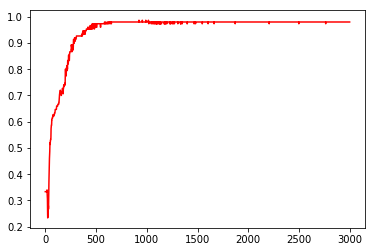

In [23]:
plt.plot(range(3000),history.history.get('acc'),c='r')

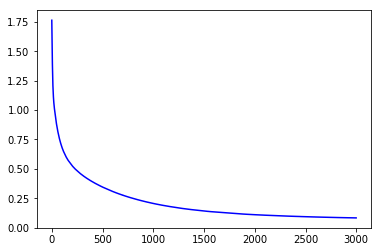

In [24]:
plt.plot(range(3000),history.history.get('loss'),c='b') 

下面使用顺序编码

In [28]:
data = pd.read_csv('./iris.csv')   

In [29]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
spe_dic ={'setosa':0,'versicolor':1,'virginica':2}  # 顺序编码

In [34]:
data['Species'] = data.Species.map(spe_dic)

In [44]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [50]:
x = data[data.columns[1:-1]]
y = data.Species

In [51]:
import tensorflow as tf
from tensorflow import keras   # 引用层
model = keras.Sequential()    # 顺序模型
from tensorflow.keras import layers #从keras引用层

In [52]:
model.add(layers.Dense(3, input_dim=4,activation='softmax'))   #输出的是3维的，输入是4维的
                                 #把sofymax激活，使输出的变成一个概率值

In [53]:
model.summary() # 查看参数

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']                                   
)              #目标数据做顺序编码，用sparse_categorical_crossentropy来计算softmax的交叉熵              

In [55]:
history = model.fit(x, y, epochs=3000)

Train on 150 samples
Epoch 1/3000
150/150 [==============================] - 0s 1ms/sample - loss: 2.3126 - acc: 0.3333
Epoch 2/3000
150/150 [==============================] - 0s 167us/sample - loss: 2.2608 - acc: 0.3333
Epoch 3/3000
150/150 [==============================] - 0s 178us/sample - loss: 2.2110 - acc: 0.3333
Epoch 4/3000
150/150 [==============================] - 0s 157us/sample - loss: 2.1664 - acc: 0.3333
Epoch 5/3000
150/150 [==============================] - 0s 178us/sample - loss: 2.1222 - acc: 0.3333
Epoch 6/3000
150/150 [==============================] - 0s 186us/sample - loss: 2.0747 - acc: 0.3333
Epoch 7/3000
150/150 [==============================] - 0s 182us/sample - loss: 2.0343 - acc: 0.3333
Epoch 8/3000
150/150 [==============================] - 0s 176us/sample - loss: 1.9954 - acc: 0.3333
Epoch 9/3000
150/150 [==============================] - 0s 175us/sample - loss: 1.9577 - acc: 0.3333
Epoch 10/3000
150/150 [==============================] - 0s 155us/sample

150/150 [==============================] - 0s 213us/sample - loss: 0.7456 - acc: 0.3733
Epoch 159/3000
150/150 [==============================] - 0s 240us/sample - loss: 0.7432 - acc: 0.3867
Epoch 160/3000
150/150 [==============================] - 0s 202us/sample - loss: 0.7404 - acc: 0.3867
Epoch 161/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.7382 - acc: 0.3867
Epoch 162/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.7356 - acc: 0.4000
Epoch 163/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.7333 - acc: 0.4067
Epoch 164/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.7309 - acc: 0.4067
Epoch 165/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.7287 - acc: 0.4067
Epoch 166/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.7263 - acc: 0.4067
Epoch 167/3000
150/150 [==============================] - 0s 201us/sample - loss: 0.7241

150/150 [==============================] - 0s 206us/sample - loss: 0.5195 - acc: 0.6733
Epoch 317/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.5186 - acc: 0.6800
Epoch 318/3000
150/150 [==============================] - 0s 174us/sample - loss: 0.5180 - acc: 0.6733
Epoch 319/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.5169 - acc: 0.6733
Epoch 320/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.5164 - acc: 0.6733
Epoch 321/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.5152 - acc: 0.6800
Epoch 322/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.5142 - acc: 0.6800
Epoch 323/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.5134 - acc: 0.6867
Epoch 324/3000
150/150 [==============================] - 0s 221us/sample - loss: 0.5125 - acc: 0.6867
Epoch 325/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.5119

Epoch 474/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.4149 - acc: 0.9533
Epoch 475/3000
150/150 [==============================] - 0s 190us/sample - loss: 0.4143 - acc: 0.9533
Epoch 476/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.4139 - acc: 0.9533
Epoch 477/3000
150/150 [==============================] - 0s 204us/sample - loss: 0.4135 - acc: 0.9533
Epoch 478/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.4128 - acc: 0.9467
Epoch 479/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.4123 - acc: 0.9533
Epoch 480/3000
150/150 [==============================] - 0s 207us/sample - loss: 0.4117 - acc: 0.9533
Epoch 481/3000
150/150 [==============================] - 0s 202us/sample - loss: 0.4112 - acc: 0.9533
Epoch 482/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.4107 - acc: 0.9600
Epoch 483/3000
150/150 [==============================] - 0s 193us/sample

150/150 [==============================] - 0s 146us/sample - loss: 0.3443 - acc: 0.9733
Epoch 633/3000
150/150 [==============================] - 0s 176us/sample - loss: 0.3441 - acc: 0.9733
Epoch 634/3000
150/150 [==============================] - 0s 188us/sample - loss: 0.3435 - acc: 0.9733
Epoch 635/3000
150/150 [==============================] - 0s 171us/sample - loss: 0.3431 - acc: 0.9667
Epoch 636/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.3428 - acc: 0.9667
Epoch 637/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.3424 - acc: 0.9667
Epoch 638/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.3422 - acc: 0.9667
Epoch 639/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.3421 - acc: 0.9667
Epoch 640/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.3412 - acc: 0.9733
Epoch 641/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.3410

Epoch 790/3000
150/150 [==============================] - 0s 228us/sample - loss: 0.2897 - acc: 0.9733
Epoch 791/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.2895 - acc: 0.9733
Epoch 792/3000
150/150 [==============================] - 0s 179us/sample - loss: 0.2891 - acc: 0.9733
Epoch 793/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.2888 - acc: 0.9733
Epoch 794/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.2885 - acc: 0.9733
Epoch 795/3000
150/150 [==============================] - 0s 167us/sample - loss: 0.2883 - acc: 0.9733
Epoch 796/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.2878 - acc: 0.9733
Epoch 797/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.2877 - acc: 0.9667
Epoch 798/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.2873 - acc: 0.9733
Epoch 799/3000
150/150 [==============================] - 0s 183us/sample

150/150 [==============================] - 0s 166us/sample - loss: 0.2464 - acc: 0.9800
Epoch 949/3000
150/150 [==============================] - 0s 160us/sample - loss: 0.2461 - acc: 0.9800
Epoch 950/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.2461 - acc: 0.9800
Epoch 951/3000
150/150 [==============================] - 0s 182us/sample - loss: 0.2456 - acc: 0.9800
Epoch 952/3000
150/150 [==============================] - 0s 167us/sample - loss: 0.2454 - acc: 0.9800
Epoch 953/3000
150/150 [==============================] - 0s 184us/sample - loss: 0.2452 - acc: 0.9800
Epoch 954/3000
150/150 [==============================] - 0s 154us/sample - loss: 0.2449 - acc: 0.9800
Epoch 955/3000
150/150 [==============================] - 0s 174us/sample - loss: 0.2446 - acc: 0.9800
Epoch 956/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.2445 - acc: 0.9800
Epoch 957/3000
150/150 [==============================] - 0s 179us/sample - loss: 0.2442

Epoch 1106/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.2122 - acc: 0.9800
Epoch 1107/3000
150/150 [==============================] - 0s 198us/sample - loss: 0.2120 - acc: 0.9800
Epoch 1108/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.2117 - acc: 0.9800
Epoch 1109/3000
150/150 [==============================] - 0s 170us/sample - loss: 0.2116 - acc: 0.9800
Epoch 1110/3000
150/150 [==============================] - 0s 185us/sample - loss: 0.2113 - acc: 0.9800
Epoch 1111/3000
150/150 [==============================] - 0s 167us/sample - loss: 0.2112 - acc: 0.9800
Epoch 1112/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.2110 - acc: 0.9800
Epoch 1113/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.2108 - acc: 0.9800
Epoch 1114/3000
150/150 [==============================] - 0s 153us/sample - loss: 0.2106 - acc: 0.9800
Epoch 1115/3000
150/150 [==============================] - 0s 14

Epoch 1263/3000
150/150 [==============================] - 0s 146us/sample - loss: 0.1853 - acc: 0.9800
Epoch 1264/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1851 - acc: 0.9800
Epoch 1265/3000
150/150 [==============================] - 0s 167us/sample - loss: 0.1850 - acc: 0.9800
Epoch 1266/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.1849 - acc: 0.9800
Epoch 1267/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.1848 - acc: 0.9800
Epoch 1268/3000
150/150 [==============================] - 0s 174us/sample - loss: 0.1845 - acc: 0.9800
Epoch 1269/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.1845 - acc: 0.9800
Epoch 1270/3000
150/150 [==============================] - 0s 176us/sample - loss: 0.1845 - acc: 0.9800
Epoch 1271/3000
150/150 [==============================] - 0s 145us/sample - loss: 0.1841 - acc: 0.9800
Epoch 1272/3000
150/150 [==============================] - 0s 18

150/150 [==============================] - 0s 155us/sample - loss: 0.1741 - acc: 0.9800
Epoch 1342/3000
150/150 [==============================] - 0s 205us/sample - loss: 0.1740 - acc: 0.9800
Epoch 1343/3000
150/150 [==============================] - 0s 177us/sample - loss: 0.1739 - acc: 0.9800
Epoch 1344/3000
150/150 [==============================] - 0s 178us/sample - loss: 0.1739 - acc: 0.9800
Epoch 1345/3000
150/150 [==============================] - 0s 152us/sample - loss: 0.1736 - acc: 0.9800
Epoch 1346/3000
150/150 [==============================] - 0s 154us/sample - loss: 0.1735 - acc: 0.9800
Epoch 1347/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.1734 - acc: 0.9800
Epoch 1348/3000
150/150 [==============================] - 0s 151us/sample - loss: 0.1733 - acc: 0.9800
Epoch 1349/3000
150/150 [==============================] - 0s 132us/sample - loss: 0.1732 - acc: 0.9800
Epoch 1350/3000
150/150 [==============================] - 0s 146us/sample - los

Epoch 1420/3000
150/150 [==============================] - 0s 170us/sample - loss: 0.1641 - acc: 0.9800
Epoch 1421/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.1640 - acc: 0.9800
Epoch 1422/3000
150/150 [==============================] - 0s 175us/sample - loss: 0.1638 - acc: 0.9800
Epoch 1423/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.1639 - acc: 0.9800
Epoch 1424/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1637 - acc: 0.9800
Epoch 1425/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1635 - acc: 0.9800
Epoch 1426/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.1634 - acc: 0.9800
Epoch 1427/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.1633 - acc: 0.9800
Epoch 1428/3000
150/150 [==============================] - 0s 160us/sample - loss: 0.1631 - acc: 0.9800
Epoch 1429/3000
150/150 [==============================] - 0s 15

150/150 [==============================] - 0s 177us/sample - loss: 0.1474 - acc: 0.9800
Epoch 1577/3000
150/150 [==============================] - 0s 190us/sample - loss: 0.1473 - acc: 0.9800
Epoch 1578/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1472 - acc: 0.9800
Epoch 1579/3000
150/150 [==============================] - ETA: 0s - loss: 0.1812 - acc: 0.937 - 0s 180us/sample - loss: 0.1471 - acc: 0.9800
Epoch 1580/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1470 - acc: 0.9800
Epoch 1581/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1469 - acc: 0.9800
Epoch 1582/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1468 - acc: 0.9800
Epoch 1583/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1468 - acc: 0.9800
Epoch 1584/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.1467 - acc: 0.9800
Epoch 1585/3000
150/150 [=================

Epoch 1733/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1340 - acc: 0.9800
Epoch 1734/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1340 - acc: 0.9800
Epoch 1735/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.1338 - acc: 0.9800
Epoch 1736/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1339 - acc: 0.9800
Epoch 1737/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.1337 - acc: 0.9800
Epoch 1738/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1336 - acc: 0.9800
Epoch 1739/3000
150/150 [==============================] - 0s 205us/sample - loss: 0.1335 - acc: 0.9800
Epoch 1740/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1335 - acc: 0.9800
Epoch 1741/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1334 - acc: 0.9800
Epoch 1742/3000
150/150 [==============================] - 0s 19

150/150 [==============================] - 0s 203us/sample - loss: 0.1234 - acc: 0.9800
Epoch 1890/3000
150/150 [==============================] - 0s 190us/sample - loss: 0.1233 - acc: 0.9800
Epoch 1891/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1233 - acc: 0.9800
Epoch 1892/3000
150/150 [==============================] - 0s 200us/sample - loss: 0.1232 - acc: 0.9800
Epoch 1893/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.1231 - acc: 0.9800
Epoch 1894/3000
150/150 [==============================] - 0s 203us/sample - loss: 0.1231 - acc: 0.9800
Epoch 1895/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.1230 - acc: 0.9800
Epoch 1896/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1230 - acc: 0.9800
Epoch 1897/3000
150/150 [==============================] - 0s 213us/sample - loss: 0.1229 - acc: 0.9800
Epoch 1898/3000
150/150 [==============================] - 0s 194us/sample - los

Epoch 1968/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1187 - acc: 0.9800
Epoch 1969/3000
150/150 [==============================] - 0s 182us/sample - loss: 0.1186 - acc: 0.9800
Epoch 1970/3000
150/150 [==============================] - 0s 208us/sample - loss: 0.1187 - acc: 0.9800
Epoch 1971/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1185 - acc: 0.9800
Epoch 1972/3000
150/150 [==============================] - 0s 177us/sample - loss: 0.1185 - acc: 0.9800
Epoch 1973/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1184 - acc: 0.9800
Epoch 1974/3000
150/150 [==============================] - 0s 219us/sample - loss: 0.1184 - acc: 0.9800
Epoch 1975/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.1183 - acc: 0.9800
Epoch 1976/3000
150/150 [==============================] - 0s 199us/sample - loss: 0.1186 - acc: 0.9800
Epoch 1977/3000
150/150 [==============================] - 0s 16

Epoch 2125/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.1107 - acc: 0.9800
Epoch 2126/3000
150/150 [==============================] - 0s 179us/sample - loss: 0.1106 - acc: 0.9800
Epoch 2127/3000
150/150 [==============================] - 0s 174us/sample - loss: 0.1106 - acc: 0.9800
Epoch 2128/3000
150/150 [==============================] - 0s 167us/sample - loss: 0.1106 - acc: 0.9800
Epoch 2129/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.1105 - acc: 0.9800
Epoch 2130/3000
150/150 [==============================] - 0s 173us/sample - loss: 0.1104 - acc: 0.9800
Epoch 2131/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1104 - acc: 0.9800
Epoch 2132/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.1104 - acc: 0.9800
Epoch 2133/3000
150/150 [==============================] - 0s 181us/sample - loss: 0.1103 - acc: 0.9800
Epoch 2134/3000
150/150 [==============================] - 0s 16

Epoch 2282/3000
150/150 [==============================] - 0s 166us/sample - loss: 0.1040 - acc: 0.9800
Epoch 2283/3000
150/150 [==============================] - 0s 182us/sample - loss: 0.1040 - acc: 0.9800
Epoch 2284/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.1040 - acc: 0.9800
Epoch 2285/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1039 - acc: 0.9800
Epoch 2286/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1038 - acc: 0.9800
Epoch 2287/3000
150/150 [==============================] - 0s 206us/sample - loss: 0.1038 - acc: 0.9800
Epoch 2288/3000
150/150 [==============================] - 0s 233us/sample - loss: 0.1039 - acc: 0.9800
Epoch 2289/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.1037 - acc: 0.9800
Epoch 2290/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.1037 - acc: 0.9800
Epoch 2291/3000
150/150 [==============================] - 0s 19

Epoch 2439/3000
150/150 [==============================] - 0s 198us/sample - loss: 0.0986 - acc: 0.9800
Epoch 2440/3000
150/150 [==============================] - 0s 194us/sample - loss: 0.0986 - acc: 0.9800
Epoch 2441/3000
150/150 [==============================] - 0s 160us/sample - loss: 0.0985 - acc: 0.9800
Epoch 2442/3000
150/150 [==============================] - 0s 153us/sample - loss: 0.0985 - acc: 0.9800
Epoch 2443/3000
150/150 [==============================] - 0s 188us/sample - loss: 0.0984 - acc: 0.9800
Epoch 2444/3000
150/150 [==============================] - 0s 196us/sample - loss: 0.0984 - acc: 0.9800
Epoch 2445/3000
150/150 [==============================] - 0s 218us/sample - loss: 0.0985 - acc: 0.9800
Epoch 2446/3000
150/150 [==============================] - 0s 187us/sample - loss: 0.0983 - acc: 0.9800
Epoch 2447/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0983 - acc: 0.9800
Epoch 2448/3000
150/150 [==============================] - 0s 20

150/150 [==============================] - 0s 166us/sample - loss: 0.0939 - acc: 0.9800
Epoch 2596/3000
150/150 [==============================] - 0s 156us/sample - loss: 0.0939 - acc: 0.9800
Epoch 2597/3000
150/150 [==============================] - 0s 247us/sample - loss: 0.0939 - acc: 0.9800
Epoch 2598/3000
150/150 [==============================] - 0s 189us/sample - loss: 0.0939 - acc: 0.9800
Epoch 2599/3000
150/150 [==============================] - 0s 169us/sample - loss: 0.0939 - acc: 0.9800
Epoch 2600/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0938 - acc: 0.9800
Epoch 2601/3000
150/150 [==============================] - 0s 210us/sample - loss: 0.0938 - acc: 0.9800
Epoch 2602/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0937 - acc: 0.9800
Epoch 2603/3000
150/150 [==============================] - 0s 171us/sample - loss: 0.0937 - acc: 0.9800
Epoch 2604/3000
150/150 [==============================] - 0s 143us/sample - los

Epoch 2752/3000
150/150 [==============================] - 0s 151us/sample - loss: 0.0900 - acc: 0.9800
Epoch 2753/3000
150/150 [==============================] - 0s 180us/sample - loss: 0.0900 - acc: 0.9800
Epoch 2754/3000
150/150 [==============================] - 0s 219us/sample - loss: 0.0900 - acc: 0.9800
Epoch 2755/3000
150/150 [==============================] - 0s 193us/sample - loss: 0.0900 - acc: 0.9800
Epoch 2756/3000
150/150 [==============================] - 0s 186us/sample - loss: 0.0899 - acc: 0.9800
Epoch 2757/3000
150/150 [==============================] - ETA: 0s - loss: 0.1245 - acc: 0.968 - 0s 236us/sample - loss: 0.0898 - acc: 0.9800
Epoch 2758/3000
150/150 [==============================] - 0s 290us/sample - loss: 0.0898 - acc: 0.9800
Epoch 2759/3000
150/150 [==============================] - 0s 222us/sample - loss: 0.0898 - acc: 0.9800
Epoch 2760/3000
150/150 [==============================] - 0s 226us/sample - loss: 0.0898 - acc: 0.9800
Epoch 2761/3000
150/150 [=

Epoch 2908/3000
150/150 [==============================] - 0s 218us/sample - loss: 0.0867 - acc: 0.9800
Epoch 2909/3000
150/150 [==============================] - 0s 188us/sample - loss: 0.0867 - acc: 0.9800
Epoch 2910/3000
150/150 [==============================] - 0s 178us/sample - loss: 0.0866 - acc: 0.9800
Epoch 2911/3000
150/150 [==============================] - 0s 171us/sample - loss: 0.0866 - acc: 0.9800
Epoch 2912/3000
150/150 [==============================] - 0s 148us/sample - loss: 0.0866 - acc: 0.9800
Epoch 2913/3000
150/150 [==============================] - 0s 154us/sample - loss: 0.0866 - acc: 0.9800
Epoch 2914/3000
150/150 [==============================] - 0s 167us/sample - loss: 0.0865 - acc: 0.9800
Epoch 2915/3000
150/150 [==============================] - 0s 172us/sample - loss: 0.0865 - acc: 0.9800
Epoch 2916/3000
150/150 [==============================] - 0s 168us/sample - loss: 0.0865 - acc: 0.9800
Epoch 2917/3000
150/150 [==============================] - 0s 16

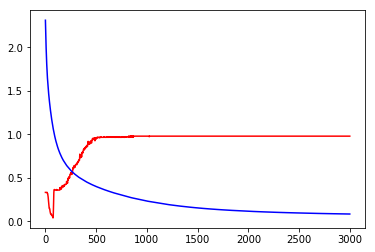

In [56]:
plt.plot(range(3000),history.history.get('acc'),c='r')
plt.plot(range(3000),history.history.get('loss'),c='b') 